In [5]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import re


from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') 



def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\-|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    vTEXT = re.sub(r'(www)(\w|\.|\-|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT.lower())


no_abbre = {
"ain't" : "have not",
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're":"who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying",
"didnt": "did not",
"bcos": "because",
"u": "you",
"qur":"quran", 
"lol":"laugh out loud",
"im": "I am",
"probly":"Probably"    
}



emoji = {
    "&lt;3": " good ",
    ":d": " good ",
    ":dd": " good ",
    ":p": " good ",
    "8)": " good ",
    ":-)": " good ",
    ":)": " good ",
    ";)": " good ",
    "(-:": " good ",
    "(:": " good ",
    "yay!": " good ",
    "yay": " good ",
    "yaay": " good ",
    "yaaay": " good ",
    "yaaaay": " good ",
    "yaaaaay": " good ",
    ":/": " bad ",
    ":&gt;": " sad ",
    ":')": " sad ",
    ":-(": " bad ",
    ":(": " bad ",
    ":s": " bad ",
    ":-s": " bad ",
    "&lt;3": " heart ",
    ":d": " smile ",
    ":p": " smile ",
    ":dd": " smile ",
    "8)": " smile ",
    ":-)": " smile ",
    ":)": " smile ",
    ";)": " smile ",
    "(-:": " smile ",
    "(:": " smile ",
    ":/": " worry ",
    ":&gt;": " angry ",
    ":')": " sad ",
    ":-(": " sad ",
    ":(": " sad ",
    ":s": " sad ",
    ":-s": " sad ",
    r"\br\b": "are",
    r"\bu\b": "you",
    r"\bhaha\b": "ha",
    r"\bhahaha\b": "ha"}



print("....start....cleaning")



#=================stop word=====================


from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

stop_words = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to']

import string

from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))



#=================replace the duplicate word=====================
import re

def substitute_repeats_fixed_len(text, nchars, ntimes=3):
    """
         Find substrings that consist of `nchars` non-space characters
         and that are repeated at least `ntimes` consecutive times,
         and replace them with a single occurrence.
         Examples: 
         abbcccddddeeeee -> abcde (nchars = 1, ntimes = 2)
         abbcccddddeeeee -> abbcde (nchars = 1, ntimes = 3)
         abababcccababab -> abcccab (nchars = 2, ntimes = 2)
    """
    return re.sub(r"(\S{{{}}})(\1{{{},}})".format(nchars, ntimes-1), r"\1", text)

def substitute_repeats(text, ntimes=3):
        # Truncate consecutive repeats of short strings
        for nchars in range(1, 20):
            text = substitute_repeats_fixed_len(text, nchars, ntimes)
        return text



#=================choose one of tokenizer=======================
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

from nltk.tokenize import TweetTokenizer

tokenizer=TweetTokenizer()


#=================final clean function=======================
def clean(comment, remove_stopwords=True, remove_punctuations=False):
    #comment=re.sub("\.\."," .",comment)
    comment=remove_urls(comment.lower())
    #remove \n
    comment=re.sub(r"\t"," ",comment)
    comment=re.sub(r"\r\n"," . ",comment)
    comment=re.sub(r"\r"," . ",comment)
    comment=re.sub(r"\n"," . ",comment)
    comment=re.sub(r"\\n\n"," . ",comment)
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    comment=re.sub("\[\[.*\]","",comment)
    comment = re.sub(r"\'ve", " have ", comment)
    
    comment = re.sub(r"\'d", " would ", comment)
    comment = re.sub(r"\'ll", " will ", comment)
    comment = re.sub(r"ca not", "cannot", comment)
    comment = re.sub(r"you ' re", "you are", comment)
    comment = re.sub(r"wtf","what the fuck", comment)
    comment = re.sub(r"i ' m", "I am", comment)
    comment = re.sub(r"I", "one", comment)
    comment = re.sub(r"II", "two", comment)
    comment = re.sub(r"III", "three", comment)
    comment=re.sub(r"mothjer","mother",comment)
    comment=re.sub(r"nazi","nazy",comment)
    comment=re.sub(r"withought","with out",comment)
    comment=substitute_repeats(comment)
    s=comment
    

    
    s = s.replace('&', '')
    s = s.replace('@', '')
    s = s.replace('0', '')
    s = s.replace('1', '')
    s = s.replace('2', '')
    s = s.replace('3', '')
    s = s.replace('4', '')
    s = s.replace('5', '')
    s = s.replace('6', '')
    s = s.replace('7', '')
    s = s.replace('8', '')
    s = s.replace('9', '')
    # s = s.replace('雲水','')

    comment=s
    #comment = re_tok.sub(' ', comment)
    #print(comment)
    words=tokenizer.tokenize(comment)
    words=[no_abbre[word] if word in no_abbre else word for word in words]
    words=[emoji[word] if word in emoji else word for word in words]
    if remove_stopwords:
        words = [w for w in words if not w in stop_words]
    
    sent=" ".join(words)
    # Remove some special characters, or noise charater, but do not remove all!!
    if remove_punctuations:
        sent = re.sub(r'([\'\"\/\-\_\--\_])',' ', sent)
    else:
        sent = re.sub(r'([\'\"\/\-\_\-\_\(\)\{\}])',' ', sent)
    clean_sent= re.sub(r'([\;\|•«\n])',' ', sent)
    clean_sent = re.sub(r"n't", " not ", clean_sent)
    
    FLAG_remove_non_ascii =True
    if FLAG_remove_non_ascii:
        return clean_sent.encode("ascii", errors="ignore").decode().strip()
    else:
        return clean_sent.strip()
from __future__ import absolute_import, division
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import re


from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') 



def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\-|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    vTEXT = re.sub(r'(www)(\w|\.|\-|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT.lower())


no_abbre = {
"ain't" : "have not",
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying",
"didnt": "did not",
"bcos": "because",
"u": "you",
"qur":"quran", 
"lol":"laugh out loud",
"im": "I am",
"probly":"Probably"    
}



emoji = {
    "&lt;3": " good ",
    ":d": " good ",
    ":dd": " good ",
    ":p": " good ",
    "8)": " good ",
    ":-)": " good ",
    ":)": " good ",
    ";)": " good ",
    "(-:": " good ",
    "(:": " good ",
    "yay!": " good ",
    "yay": " good ",
    "yaay": " good ",
    "yaaay": " good ",
    "yaaaay": " good ",
    "yaaaaay": " good ",
    ":/": " bad ",
    ":&gt;": " sad ",
    ":')": " sad ",
    ":-(": " bad ",
    ":(": " bad ",
    ":s": " bad ",
    ":-s": " bad ",
    "&lt;3": " heart ",
    ":d": " smile ",
    ":p": " smile ",
    ":dd": " smile ",
    "8)": " smile ",
    ":-)": " smile ",
    ":)": " smile ",
    ";)": " smile ",
    "(-:": " smile ",
    "(:": " smile ",
    ":/": " worry ",
    ":&gt;": " angry ",
    ":')": " sad ",
    ":-(": " sad ",
    ":(": " sad ",
    ":s": " sad ",
    ":-s": " sad ",
    r"\br\b": "are",
    r"\bu\b": "you",
    r"\bhaha\b": "ha",
    r"\bhahaha\b": "ha"}



print("....start....cleaning")



#=================stop word=====================


from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

stop_words = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
              'just','so','than','such','both','through','about','for','is','of','while','during','to']

import string

from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))



#=================replace the duplicate word=====================
import re

def substitute_repeats_fixed_len(text, nchars, ntimes=3):
    """
         Find substrings that consist of `nchars` non-space characters
         and that are repeated at least `ntimes` consecutive times,
         and replace them with a single occurrence.
         Examples: 
         abbcccddddeeeee -> abcde (nchars = 1, ntimes = 2)
         abbcccddddeeeee -> abbcde (nchars = 1, ntimes = 3)
         abababcccababab -> abcccab (nchars = 2, ntimes = 2)
    """
    return re.sub(r"(\S{{{}}})(\1{{{},}})".format(nchars, ntimes-1), r"\1", text)

def substitute_repeats(text, ntimes=3):
        # Truncate consecutive repeats of short strings
        for nchars in range(1, 20):
            text = substitute_repeats_fixed_len(text, nchars, ntimes)
        return text



#=================choose one of tokenizer=======================
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

from nltk.tokenize import TweetTokenizer

tokenizer=TweetTokenizer()


#=================final clean function=======================
def clean(comment, remove_stopwords=True, remove_punctuations=False):
    #comment=re.sub("\.\."," .",comment)
    comment=remove_urls(comment.lower())
    #remove \n
    comment=re.sub(r"\t"," ",comment)
    comment=re.sub(r"\r\n"," . ",comment)
    comment=re.sub(r"\r"," . ",comment)
    comment=re.sub(r"\n"," . ",comment)
    comment=re.sub(r"\\n\n"," . ",comment)
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    comment=re.sub("\[\[.*\]","",comment)
    comment = re.sub(r"\'ve", " have ", comment)
    
    comment = re.sub(r"\'d", " would ", comment)
    comment = re.sub(r"\'ll", " will ", comment)
    comment = re.sub(r"ca not", "cannot", comment)
    comment = re.sub(r"you ' re", "you are", comment)
    comment = re.sub(r"wtf","what the fuck", comment)
    comment = re.sub(r"i ' m", "I am", comment)
    comment = re.sub(r"I", "one", comment)
    comment = re.sub(r"II", "two", comment)
    comment = re.sub(r"III", "three", comment)
    comment=re.sub(r"mothjer","mother",comment)
    comment=re.sub(r"nazi","nazy",comment)
    comment=re.sub(r"withought","with out",comment)
    comment=substitute_repeats(comment)
    s=comment
    

    
    s = s.replace('&', '')
    s = s.replace('@', '')
    s = s.replace('0', '')
    s = s.replace('1', '')
    s = s.replace('2', '')
    s = s.replace('3', '')
    s = s.replace('4', '')
    s = s.replace('5', '')
    s = s.replace('6', '')
    s = s.replace('7', '')
    s = s.replace('8', '')
    s = s.replace('9', '')
    # s = s.replace('雲水','')

    comment=s
    #comment = re_tok.sub(' ', comment)
    #print(comment)
    words=tokenizer.tokenize(comment)
    words=[no_abbre[word] if word in no_abbre else word for word in words]
    words=[emoji[word] if word in emoji else word for word in words]
    if remove_stopwords:
        words = [w for w in words if not w in stop_words]
    
    sent=" ".join(words)
    # Remove some special characters, or noise charater, but do not remove all!!
    if remove_punctuations:
        sent = re.sub(r'([\'\"\/\-\_\--\_])',' ', sent)
    else:
        sent = re.sub(r'([\'\"\/\-\_\-\_\(\)\{\}])',' ', sent)
    clean_sent= re.sub(r'([\;\|•«\n])',' ', sent)
    clean_sent = re.sub(r"n't", " not ", clean_sent)
    
    FLAG_remove_non_ascii =True
    if FLAG_remove_non_ascii:
        return clean_sent.encode("ascii", errors="ignore").decode().strip()
    else:
        return clean_sent.strip()


....start....cleaning
....start....cleaning


In [6]:
import gc
gc.collect()
#from commen_preprocess import *
from skmultilearn.adapt import brknn
from skmultilearn.adapt import MLkNN
from skmultilearn.problem_transform import br
from skmultilearn.problem_transform import BinaryRelevance
import scipy
import sklearn.metrics
import argparse
import numpy
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble  import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn import neural_network
from sklearn import linear_model
import gensim, sklearn
from collections import defaultdict
from batch_gen import batch_gen
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import MultiLabelBinarizer
from xgboost import XGBClassifier
from sklearn.externals import joblib
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import VotingClassifier
import os
from string import punctuation
from gensim.parsing.preprocessing import STOPWORDS
import tensorflow as tf
import tensorflow_hub as hub
import re
from tqdm import tqdm
import pickle
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix,make_scorer, f1_score, accuracy_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
ps = PorterStemmer()
import pandas as pd
import numpy as np
import json
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt





/home/binny/anaconda3/envs/punyajoy-nogpu/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
with open('../Counter_NonCounter/Data/Counterspeech_Dataset.json') as fp:
    train_data = json.load(fp)

In [9]:
def convert_class_label(input_text):
    if input_text:
        return 'counter'
    else:
        return 'noncounter'

In [10]:
pd_train = pd.DataFrame(columns=['id','class','community','category','text'])

for count, each in enumerate(train_data):
    try:
        pd_train.loc[count]  = [each['id'], convert_class_label(each['CounterSpeech']), each['Community'],each['Category'],each['commentText']]
    except:
        pass
print('Training Data Loading Completed...')
pd_train =pd_train[pd_train['category']!='Default']

Training Data Loading Completed...


In [11]:
list1=[[],[],[],[],[],[],[],[],[],[]]


for ele in pd_train['category']:
    temp=[]
    #print(ele)
    for i in range(0,len(ele),2):
        temp.append(ord(ele[i])-ord('0'))
    #print(temp)
    if(len(temp)==0):
        print(temp)
    for i in range(0,10):
        if i+1 in temp:
            list1[i].append(1)
        else:
            list1[i].append(0)
y_train=np.array([np.array(xi) for xi in list1])            

In [24]:
from collections import OrderedDict, Counter

pd_train = pd.DataFrame(OrderedDict({'text':list(pd_train['text']),'Presenting Facts':list1[0],'Pointing our hypocrisy':list1[1],'Warning of consequences':list1[2],'Affiliation':list1[3],'Denouncing speech':list1[4],'Humor and sarcasm':list1[6],'Positive tone':list1[7],'Hostile language':list1[8]}))
pd_train = pd_train[['Presenting Facts', 'Pointing our hypocrisy', 'Warning of consequences','Affiliation','Denouncing speech','Humor and sarcasm','Positive tone','Hostile language','text']]

pd_train['text'].replace('', np.nan, inplace=True)
pd_train.dropna(subset=['text'], inplace=True)


In [25]:
print("Number of rows in data =",pd_train.shape[0])
print("Number of columns in data =",pd_train.shape[1])
print("\n")
pd_train.head()

Number of rows in data = 4092
Number of columns in data = 9




,Presenting Facts,Pointing our hypocrisy,Warning of consequences,Affiliation,Denouncing speech,Humor and sarcasm,Positive tone,Hostile language,text
0,0,1,0,0,0,0,1,0,What kind of God is it that Hates people & Cur...
1,0,0,0,0,0,0,1,0,Question - Which comment is racist and why?\n ...
2,0,0,0,0,0,0,1,0,That Israel fail that is nothing new. That Isr...
3,0,0,0,0,0,0,0,1,This god damned ignorant little prick doesn't ...
4,0,1,0,0,0,0,0,0,our shit may be cooler but... police brutality...


In [26]:
categories = list(pd_train.columns.values)
categories = categories[:-1]


In [27]:
data = pd_train[categories]

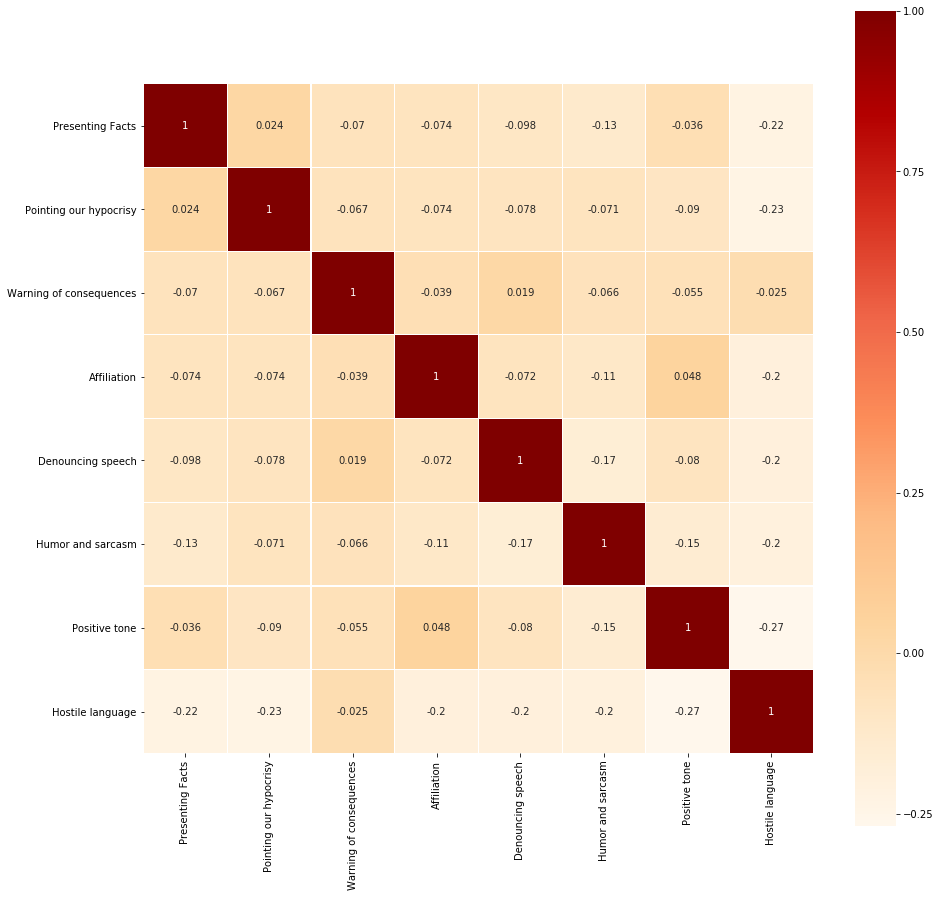

In [28]:
colormap = plt.cm.OrRd
plt.figure(figsize=(15,15))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [23]:
counts = []
for category in categories:
    counts.append((category, pd_train[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,Affiliation,342
1,Denouncing speech,686
2,Presenting Facts,493
3,Positive tone,523
4,Warning of consequences,228
5,Pointing our hypocrisy,494
6,Humor and sarcasm,613
7,Hostile language,1677


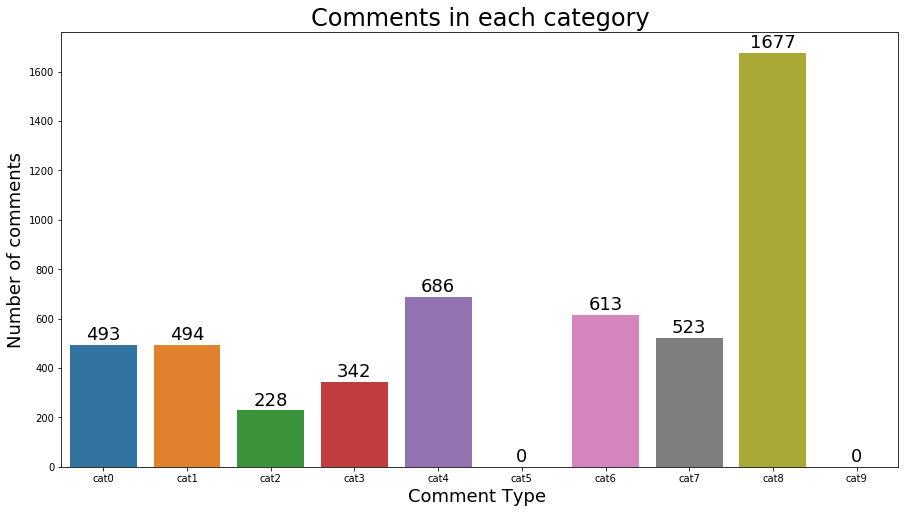

In [21]:

plt.figure(figsize=(15,8))

ax= sns.barplot(categories, pd_train.iloc[:,:-1].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = pd_train.iloc[:,:-1].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

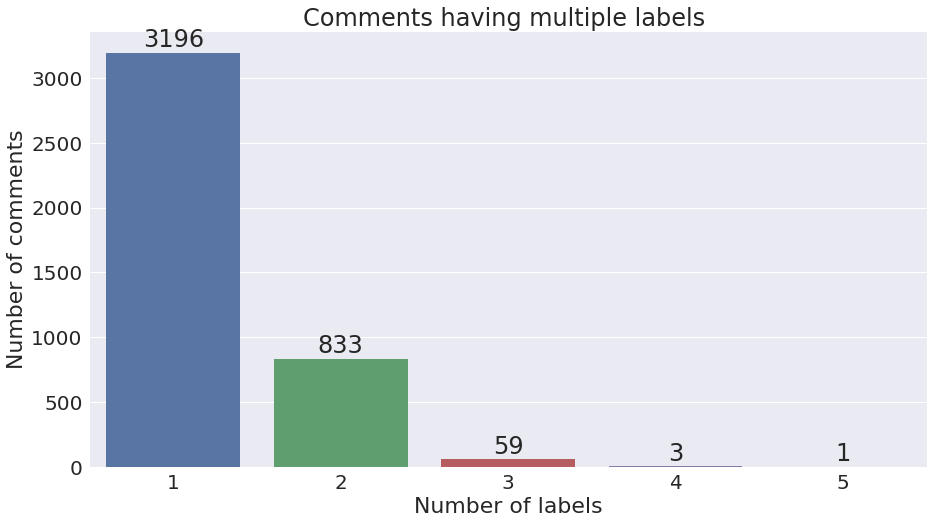

In [61]:
rowSums = pd_train.iloc[:,:-1].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments')
plt.xlabel('Number of labels')

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

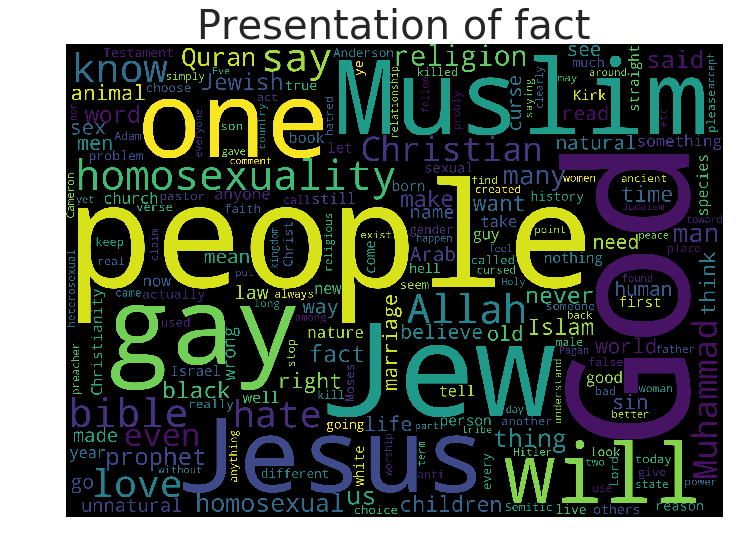

In [25]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat0==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Presentation of fact",fontsize=40)
plt.imshow(cloud_toxic)



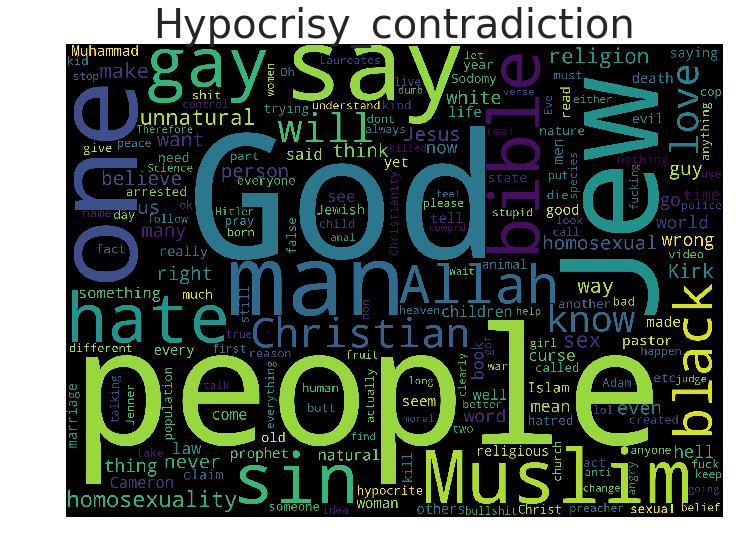

In [26]:

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat1==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Hypocrisy_contradiction",fontsize=40)
plt.imshow(cloud_toxic)

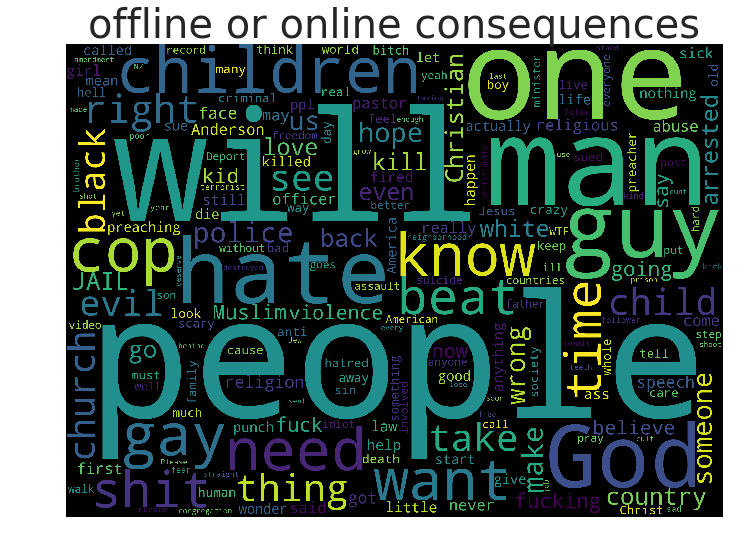

In [28]:

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat2==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("offline or online consequences",fontsize=40)
plt.imshow(cloud_toxic)

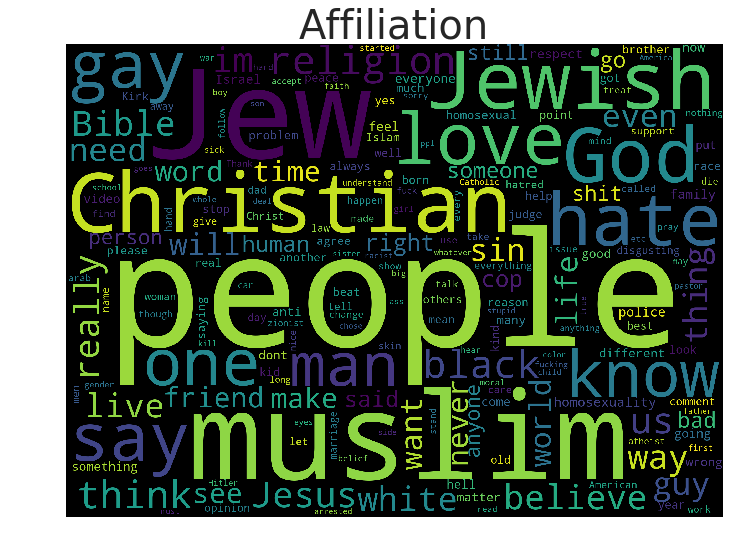

In [30]:

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat3==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Affiliation",fontsize=40)
plt.imshow(cloud_toxic)

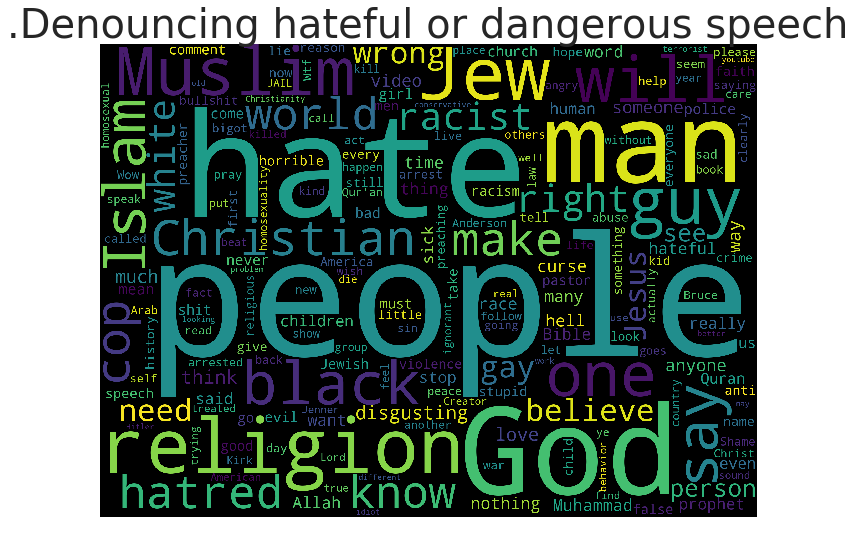

In [31]:

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat4==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Denouncing hateful or dangerous speech",fontsize=40)
plt.imshow(cloud_toxic)

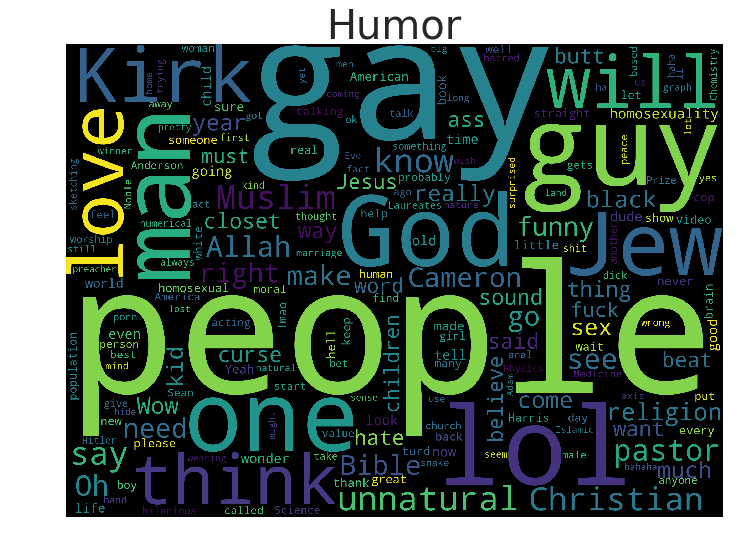

In [32]:

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat6==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Humor",fontsize=40)
plt.imshow(cloud_toxic)

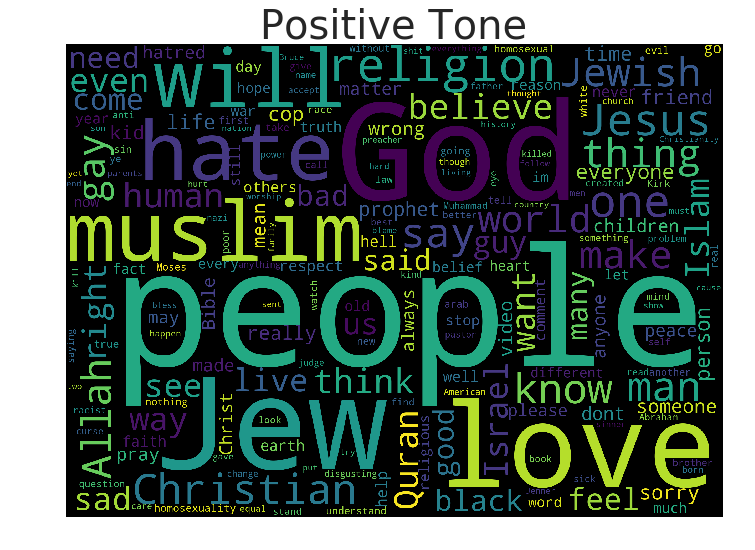

In [33]:

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat7==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Positive Tone",fontsize=40)
plt.imshow(cloud_toxic)

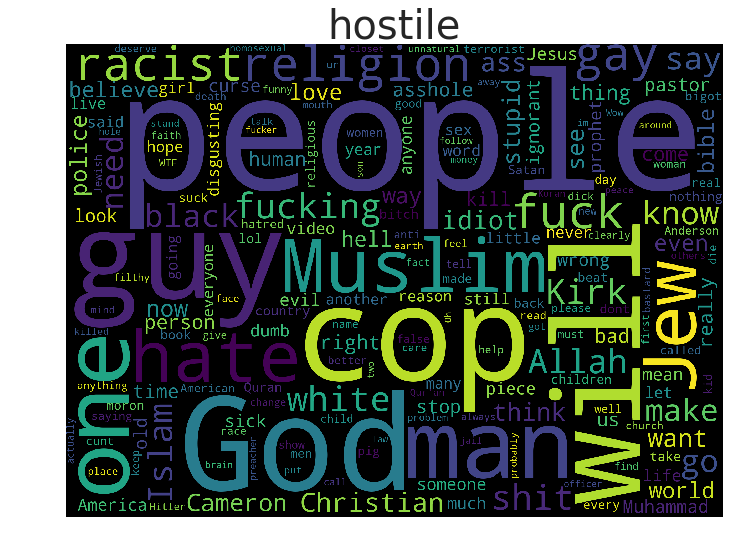

In [34]:

plt.figure(figsize=(40,25))

# toxic
subset = pd_train[pd_train.cat8==1]
text = subset.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("hostile",fontsize=40)
plt.imshow(cloud_toxic)

In [74]:
def get_data():
    comments=pd_train['text'].values
    df = pd_train.drop('text', 1)
    labels=df.values
    list_comment=[]
    for comment,label in zip(comments,labels):
        temp={}
        temp['text']=comment
        temp['label']=label
        list_comment.append(temp)
    return list_comment    
### stopwords and punctuations are not removed but text is cleaned and stemmed
def glove_tokenize_norem(text):
    #text = tokenizer(text)
    text=clean(text, remove_stopwords=False, remove_punctuations=False)
    words = text.split()
    #words =[ps.stem(word) for word in words]
    return words

####stopwords and punctuations are removed along with that text is cleaned ans stemmed
def glove_tokenize(text):
    #text = tokenizer(text)
    text=clean(text, remove_stopwords=False, remove_punctuations=False)
    text = ''.join([c for c in text if c not in punctuation])
    words = text.split()
    words = [word for word in words if word not in STOPWORDS]
    #words =[ps.stem(word) for word in words]
    return words
TOKENIZER = glove_tokenize
comments = get_data()
X, y = [], []
for comment in comments:
    y.append(comment['label'])
    X.append(comment['text'])


#Word Level Features
word_vectorizer = TfidfVectorizer(sublinear_tf=False, ngram_range=(1,3),
            min_df=1, 
            strip_accents='unicode',
            #smooth_idf=1,
            analyzer='word', 
            stop_words='english',
            tokenizer=TOKENIZER,             
            max_features=500)
    
wv=word_vectorizer.fit_transform(X)
wv.shape 


(4092, 500)

In [75]:
tfidf = dict(zip(word_vectorizer.get_feature_names(), word_vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

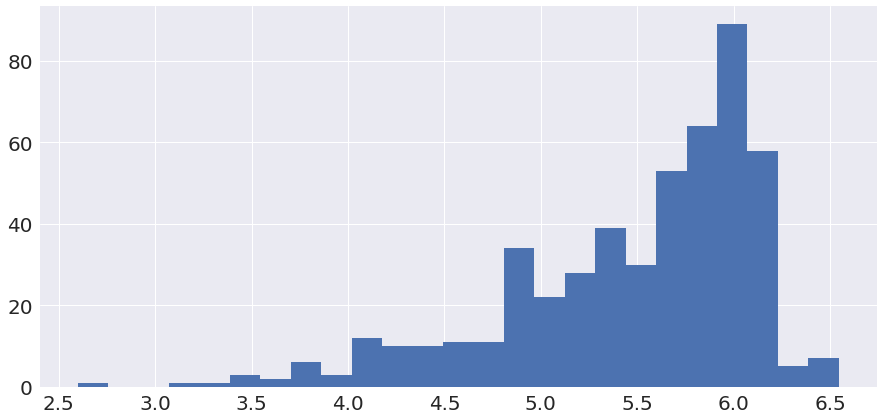

In [76]:
tfidf.tfidf.hist(bins=25, figsize=(15,7))


In [55]:
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

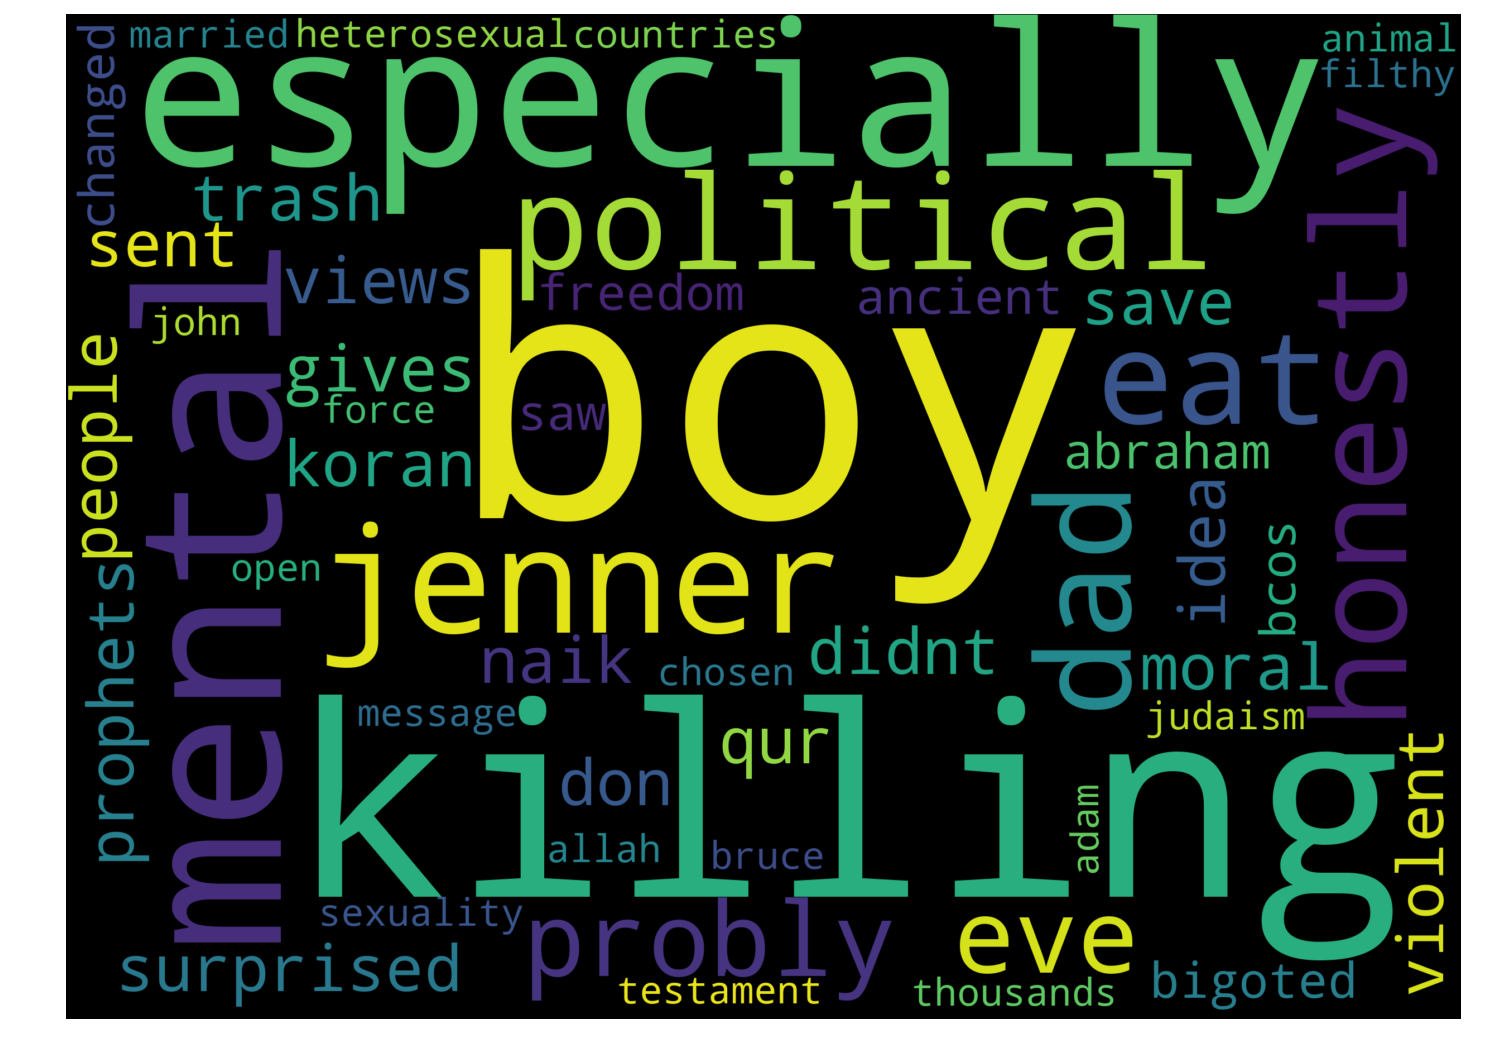

In [58]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(50))


In [77]:
from nltk import FreqDist

word_dist = FreqDist()
for s in pd_train.text.values:
    word_dist.update(glove_tokenize_norem(s))



In [83]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
sorted_by_value = sorted(word_dist.items(), key=lambda kv: kv[1])
pp.pprint(sorted_by_value)

[   ('burns', 1),
    ('executing', 1),
    ('vthey', 1),
    ('spreads', 1),
    ('shithole', 1),
    ('procrustean', 1),
    ('missionaries', 1),
    ('espousing', 1),
    ('ceiling', 1),
    ('ott', 1),
    ('rebelious', 1),
    ('religoun', 1),
    ('reaches', 1),
    ('assertion', 1),
    ('exaggerate', 1),
    ('mormon', 1),
    ('politicaly', 1),
    ('thatmuslims', 1),
    ('strait', 1),
    ('ganesh', 1),
    ('covetness', 1),
    ('apa', 1),
    ('whichever', 1),
    ('opposites', 1),
    ('greeksromanseygptianswe', 1),
    ('doorstep', 1),
    ('diverse', 1),
    ('remarriage', 1),
    ('tricked', 1),
    ('decency', 1),
    ('predator', 1),
    ('extend', 1),
    ('pacifying', 1),
    ('absence', 1),
    ('pokemon', 1),
    ('monotheistic', 1),
    ('haircuts', 1),
    ('forgiver', 1),
    ('polyamory', 1),
    ('existso', 1),
    ('ministry', 1),
    ('truths', 1),
    ('peck', 1),
    ('quranic', 1),
    ('whuppin', 1),
    ('django', 1),
    ('copious', 1),
    ('afro', 

    ('relief', 1),
    ('dpeaking', 1),
    ('persue', 1),
    ('num', 1),
    ('lunitic', 1),
    ('usonly', 1),
    ('fold', 1),
    ('congratulations', 1),
    ('grade', 1),
    ('clinics', 1),
    ('holiness', 1),
    ('imposes', 1),
    ('ammendment', 1),
    ('cultic', 1),
    ('tabootoevah', 1),
    ('negated', 1),
    ('punishments', 1),
    ('nutcaseand', 1),
    ('charming', 1),
    ('fans', 1),
    ('gaysexuals', 1),
    ('appointment', 1),
    ('activities', 1),
    ('bloodthirsty', 1),
    ('worries', 1),
    ('competition', 1),
    ('fishy', 1),
    ('degenerative', 1),
    ('shinde', 1),
    ('questionhaha', 1),
    ('judicial', 1),
    ('integrated', 1),
    ('harrassing', 1),
    ('lifestylewhy', 1),
    ('pack', 1),
    ('paki', 1),
    ('penny', 1),
    ('nuclear', 1),
    ('spook', 1),
    ('widows', 1),
    ('neing', 1),
    ('muhamads', 1),
    ('zip', 1),
    ('hypothetical', 1),
    ('precious', 1),
    ('myb', 1),
    ('hailed', 1),
    ('overpopulated', 1),
  

    ('humankind', 2),
    ('heretic', 2),
    ('charges', 2),
    ('adjusted', 2),
    ('tennessee', 2),
    ('charlatan', 2),
    ('mesopotamians', 2),
    ('limited', 2),
    ('caitlin', 2),
    ('prejudiced', 2),
    ('rong', 2),
    ('sahih', 2),
    ('bloodshed', 2),
    ('yale', 2),
    ('aim', 2),
    ('remembers', 2),
    ('medieval', 2),
    ('sadistic', 2),
    ('pharaoh', 2),
    ('henry', 2),
    ('unfortunate', 2),
    ('celibate', 2),
    ('gain', 2),
    ('fooling', 2),
    ('moderate', 2),
    ('esp', 2),
    ('neighbors', 2),
    ('battle', 2),
    ('forum', 2),
    ('weiner', 2),
    ('committ', 2),
    ('chris', 2),
    ('bases', 2),
    ('discribe', 2),
    ('recall', 2),
    ('skinny', 2),
    ('boom', 2),
    ('secondly', 2),
    ('bestowed', 2),
    ('finished', 2),
    ('stretched', 2),
    ('revolting', 2),
    ('cking', 2),
    ('pursuit', 2),
    ('primates', 2),
    ('fixed', 2),
    ('misfortune', 2),
    ('deeply', 2),
    ('buck', 2),
    ('literalist', 2

    ('cells', 4),
    ('drugs', 4),
    ('web', 4),
    ('stance', 4),
    ('sides', 4),
    ('patriarchs', 4),
    ('host', 4),
    ('wwii', 4),
    ('automatically', 4),
    ('corinthians', 4),
    ('challenged', 4),
    ('bear', 4),
    ('punish', 4),
    ('genius', 4),
    ('utterly', 4),
    ('secretly', 4),
    ('helps', 4),
    ('ptsd', 4),
    ('punching', 4),
    ('area', 4),
    ('glasses', 4),
    ('incorrect', 4),
    ('religon', 4),
    ('plain', 4),
    ('embarrassing', 4),
    ('revilers', 4),
    ('houses', 4),
    ('mohamed', 4),
    ('dug', 4),
    ('deliberately', 4),
    ('won', 4),
    ('misinformed', 4),
    ('purposely', 4),
    ('sports', 4),
    ('treating', 4),
    ('strictly', 4),
    ('lips', 4),
    ('morgan', 4),
    ('ss', 4),
    ('charged', 4),
    ('weather', 4),
    ('jackass', 4),
    ('interpret', 4),
    ('emotions', 4),
    ('cunts', 4),
    ('homophobes', 4),
    ('designed', 4),
    ('ahead', 4),
    ('lawyer', 4),
    ('training', 4),
    ('che

In [88]:
print(tfidf.sort_values(by=['tfidf'], ascending=False).to_string())

                            tfidf
qur                      6.544445
allah s                  6.483820
probly                   6.483820
abraham                  6.426662
mental                   6.426662
n                        6.426662
bruce jenner             6.426662
heterosexual             6.372594
eat                      6.272511
chosen people            6.272511
ancient                  6.272511
john                     6.272511
sent                     6.225991
boy                      6.225991
testament                6.225991
gives                    6.225991
violent                  6.225991
judaism                  6.225991
moral                    6.225991
boys                     6.181539
killing                  6.181539
sexuality                6.181539
trash                    6.181539
surprised                6.181539
dad                      6.181539
didnt                    6.181539
married                  6.181539
honestly                 6.181539
prophets      